Shape of the dataset (1000, 113)
dataset variable types: Month_1          float64
Ay               float64
Dolar            float64
Altın            float64
Petrol           float64
                  ...   
 Doğu            float64
Kira Getirisi    float64
Kiracılı         float64
Mülk Sahibi      float64
Aidat            float64
Length: 113, dtype: object
first 10 rows of the dataset
   Month_1   Ay    Dolar    Altın  Petrol   Beton     Demir      Fiyat  \
0      1.0  1.0  29.3957  1966.77   80.19  1900.0  21939.81  1950000.0   
1      1.0  1.0  29.3957  1966.77   80.19  1900.0  21939.81  1800000.0   
2      1.0  1.0  29.3957  1966.77   80.19  1900.0  21939.81  2875000.0   
3      1.0  1.0  29.3957  1966.77   80.19  1900.0  21939.81  1850000.0   
4      1.0  1.0  29.3957  1966.77   80.19  1900.0  21939.81  2000000.0   
5      1.0  1.0  29.3957  1966.77   80.19  1900.0  21939.81  1600000.0   
6      1.0  1.0  29.3957  1966.77   80.19  1900.0  21939.81  1500000.0   
7      1.0  1.0  29.

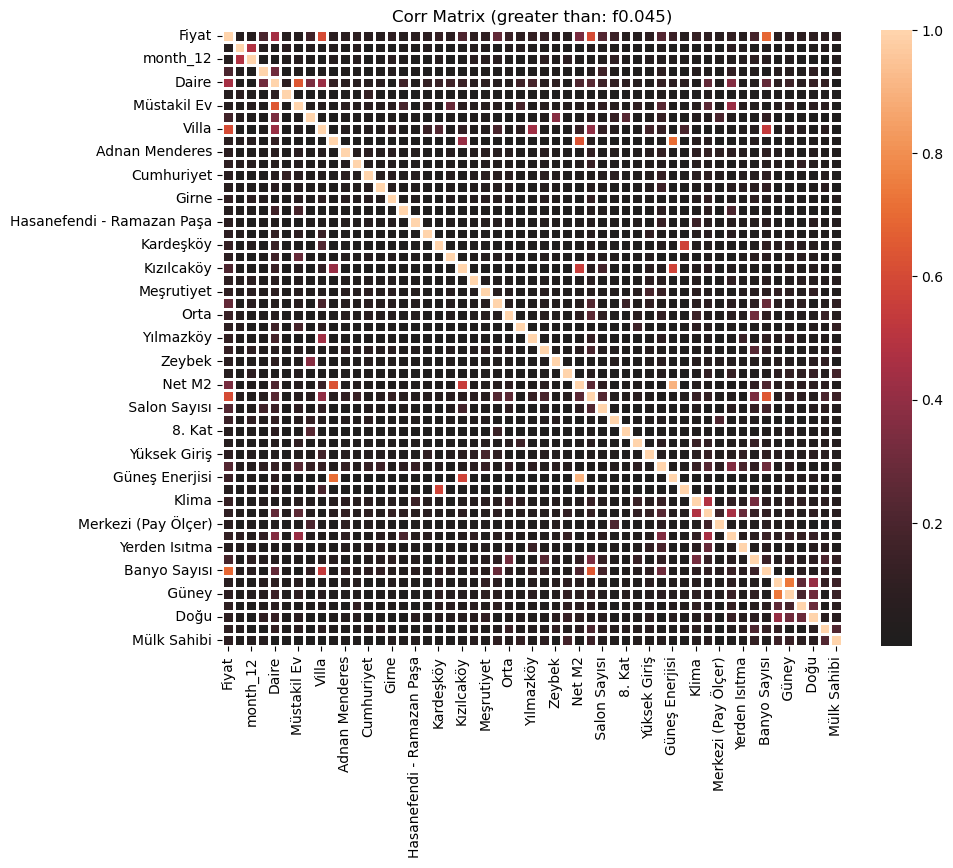

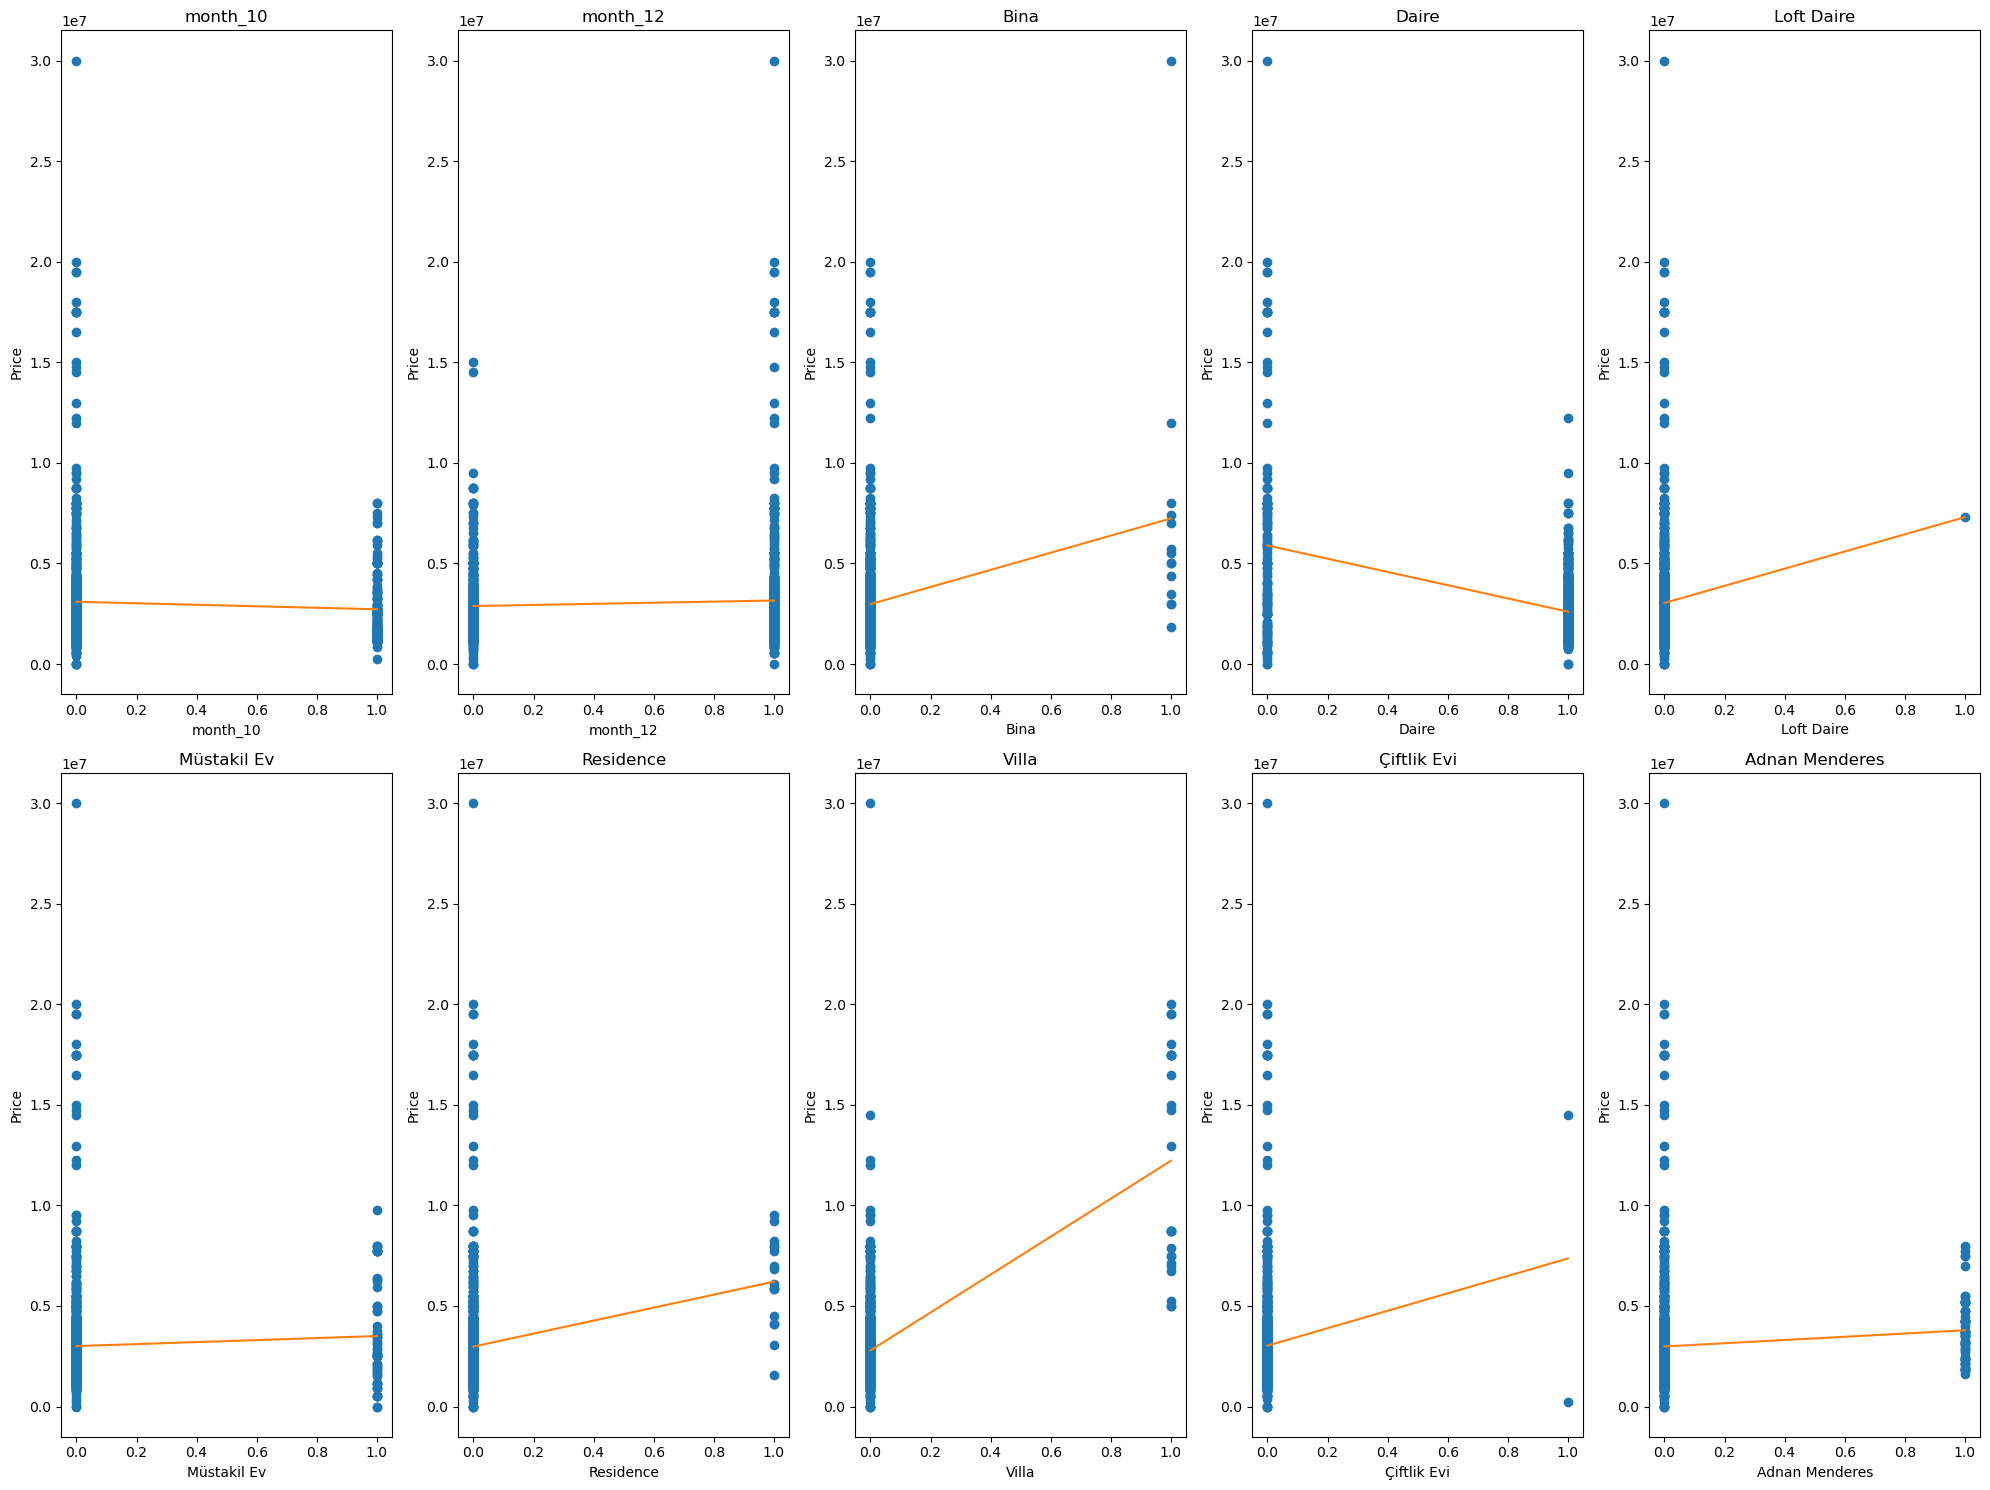

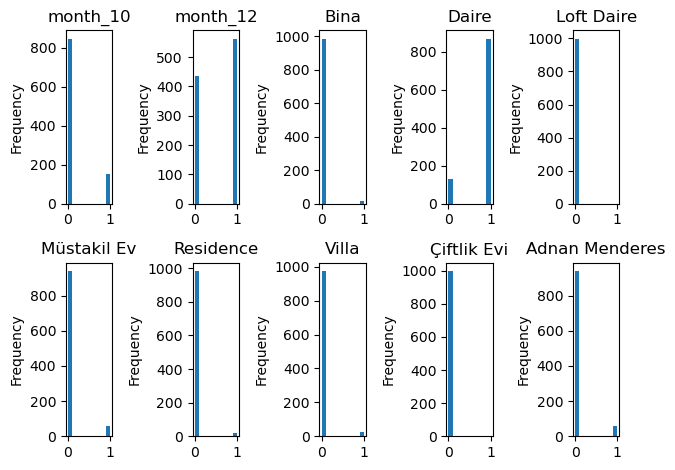

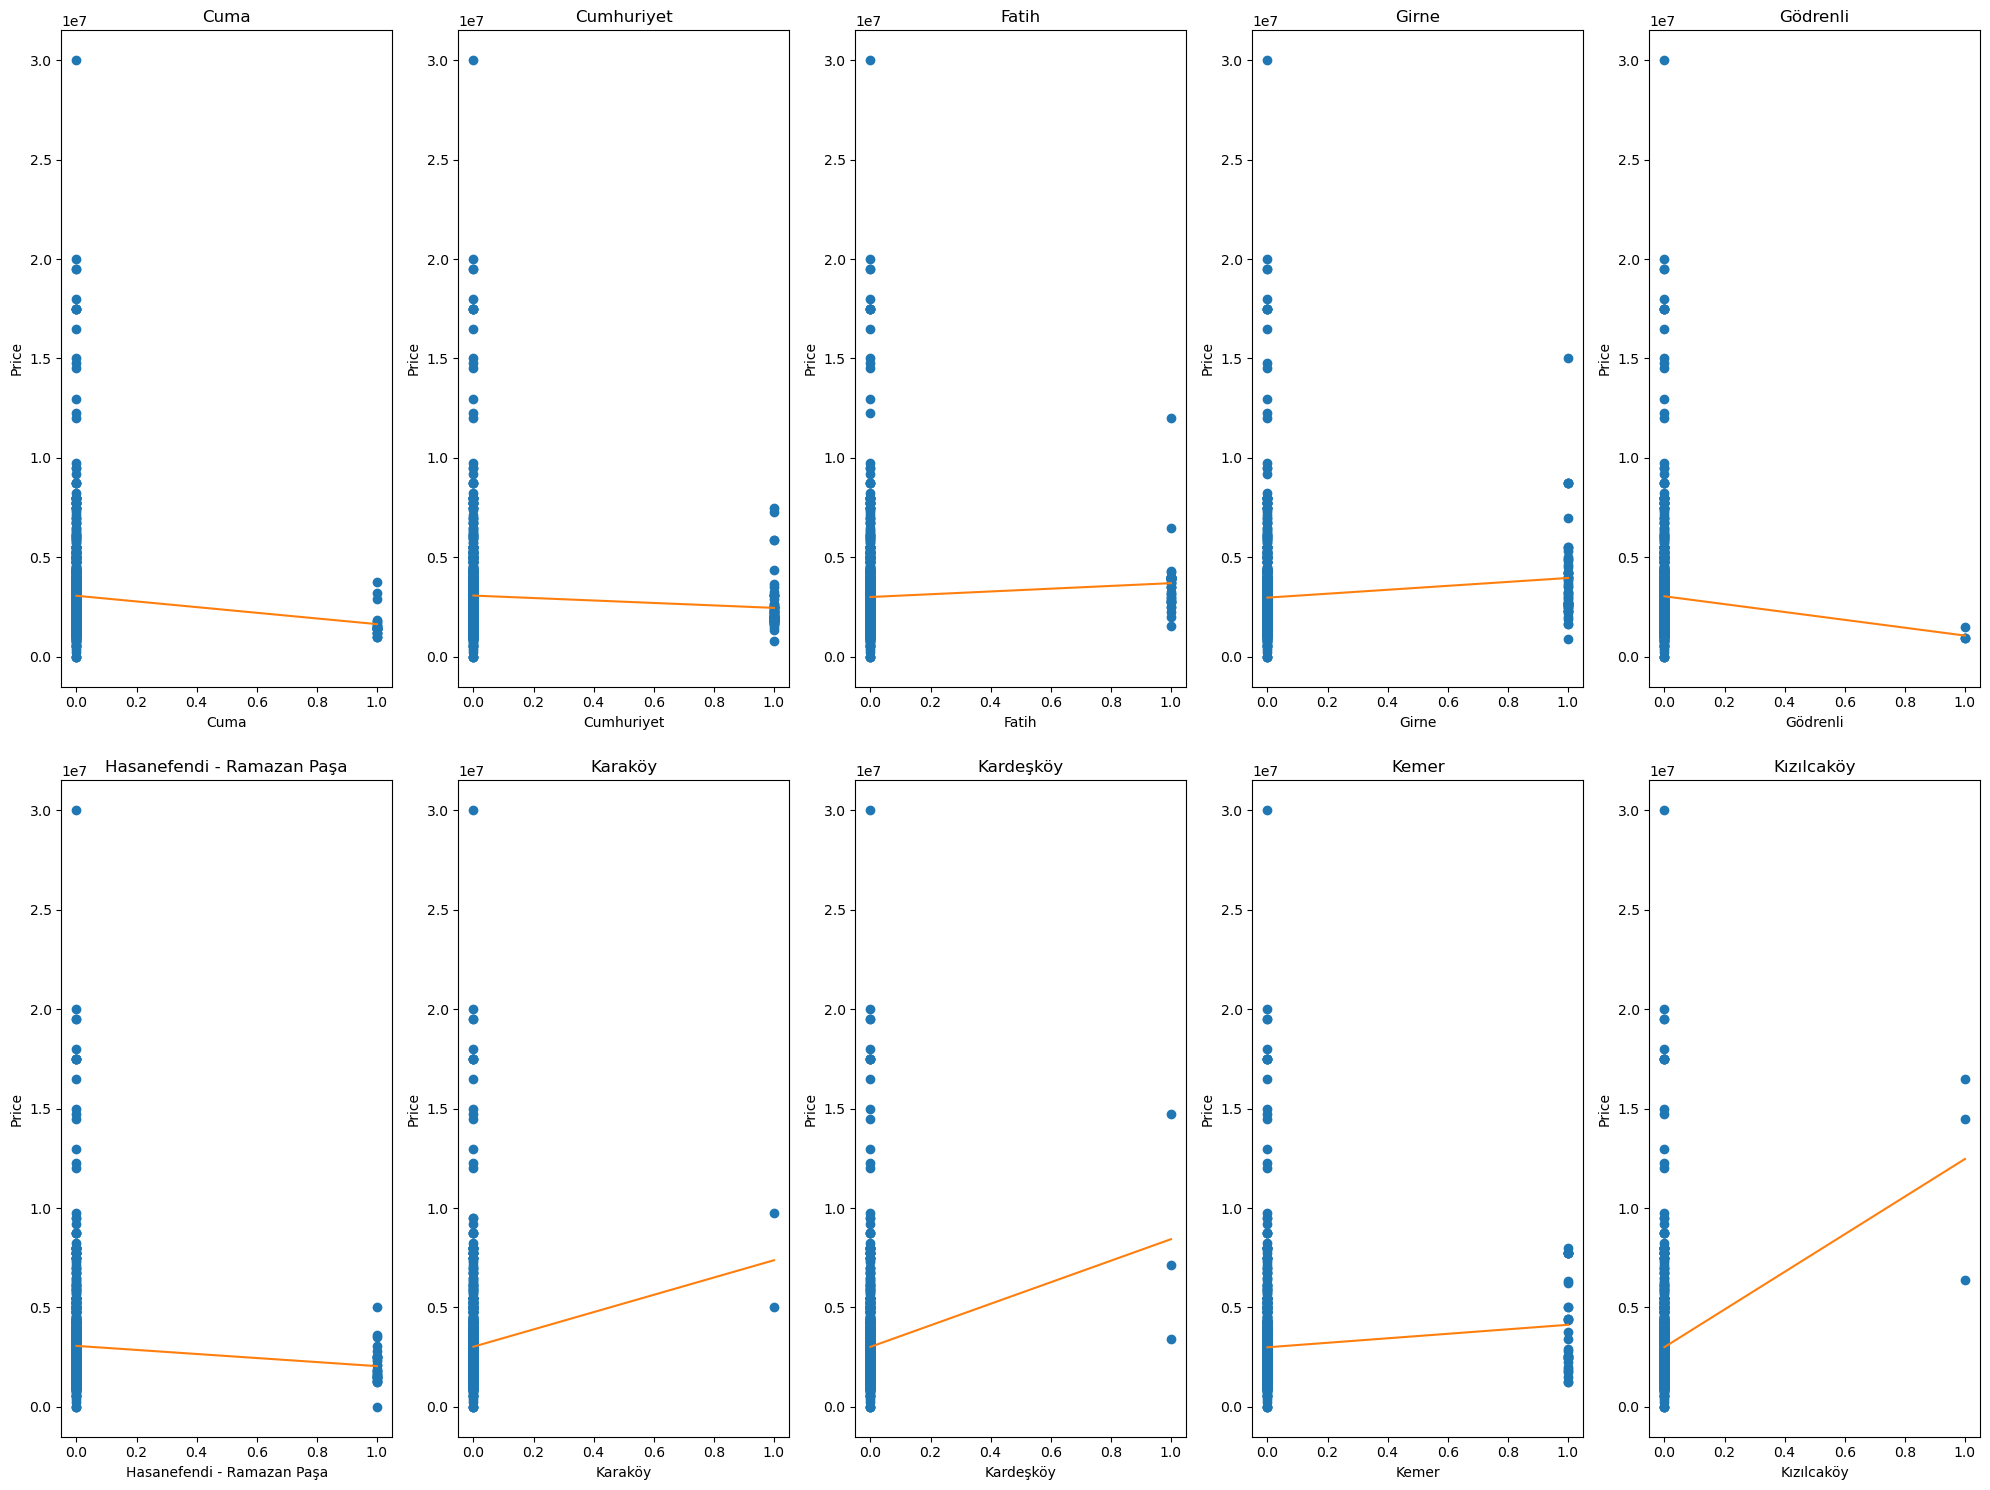

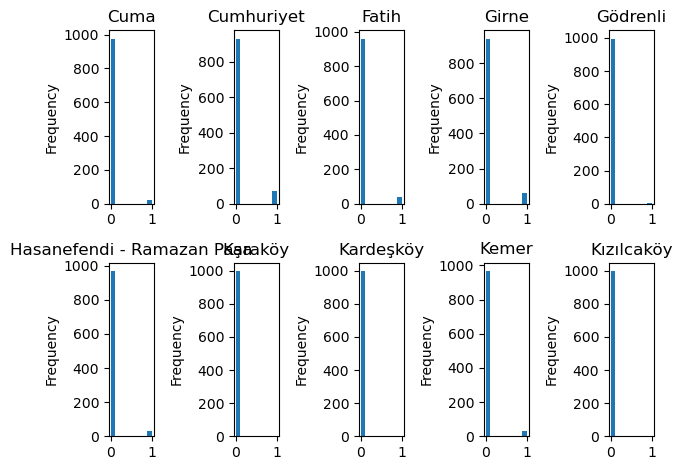

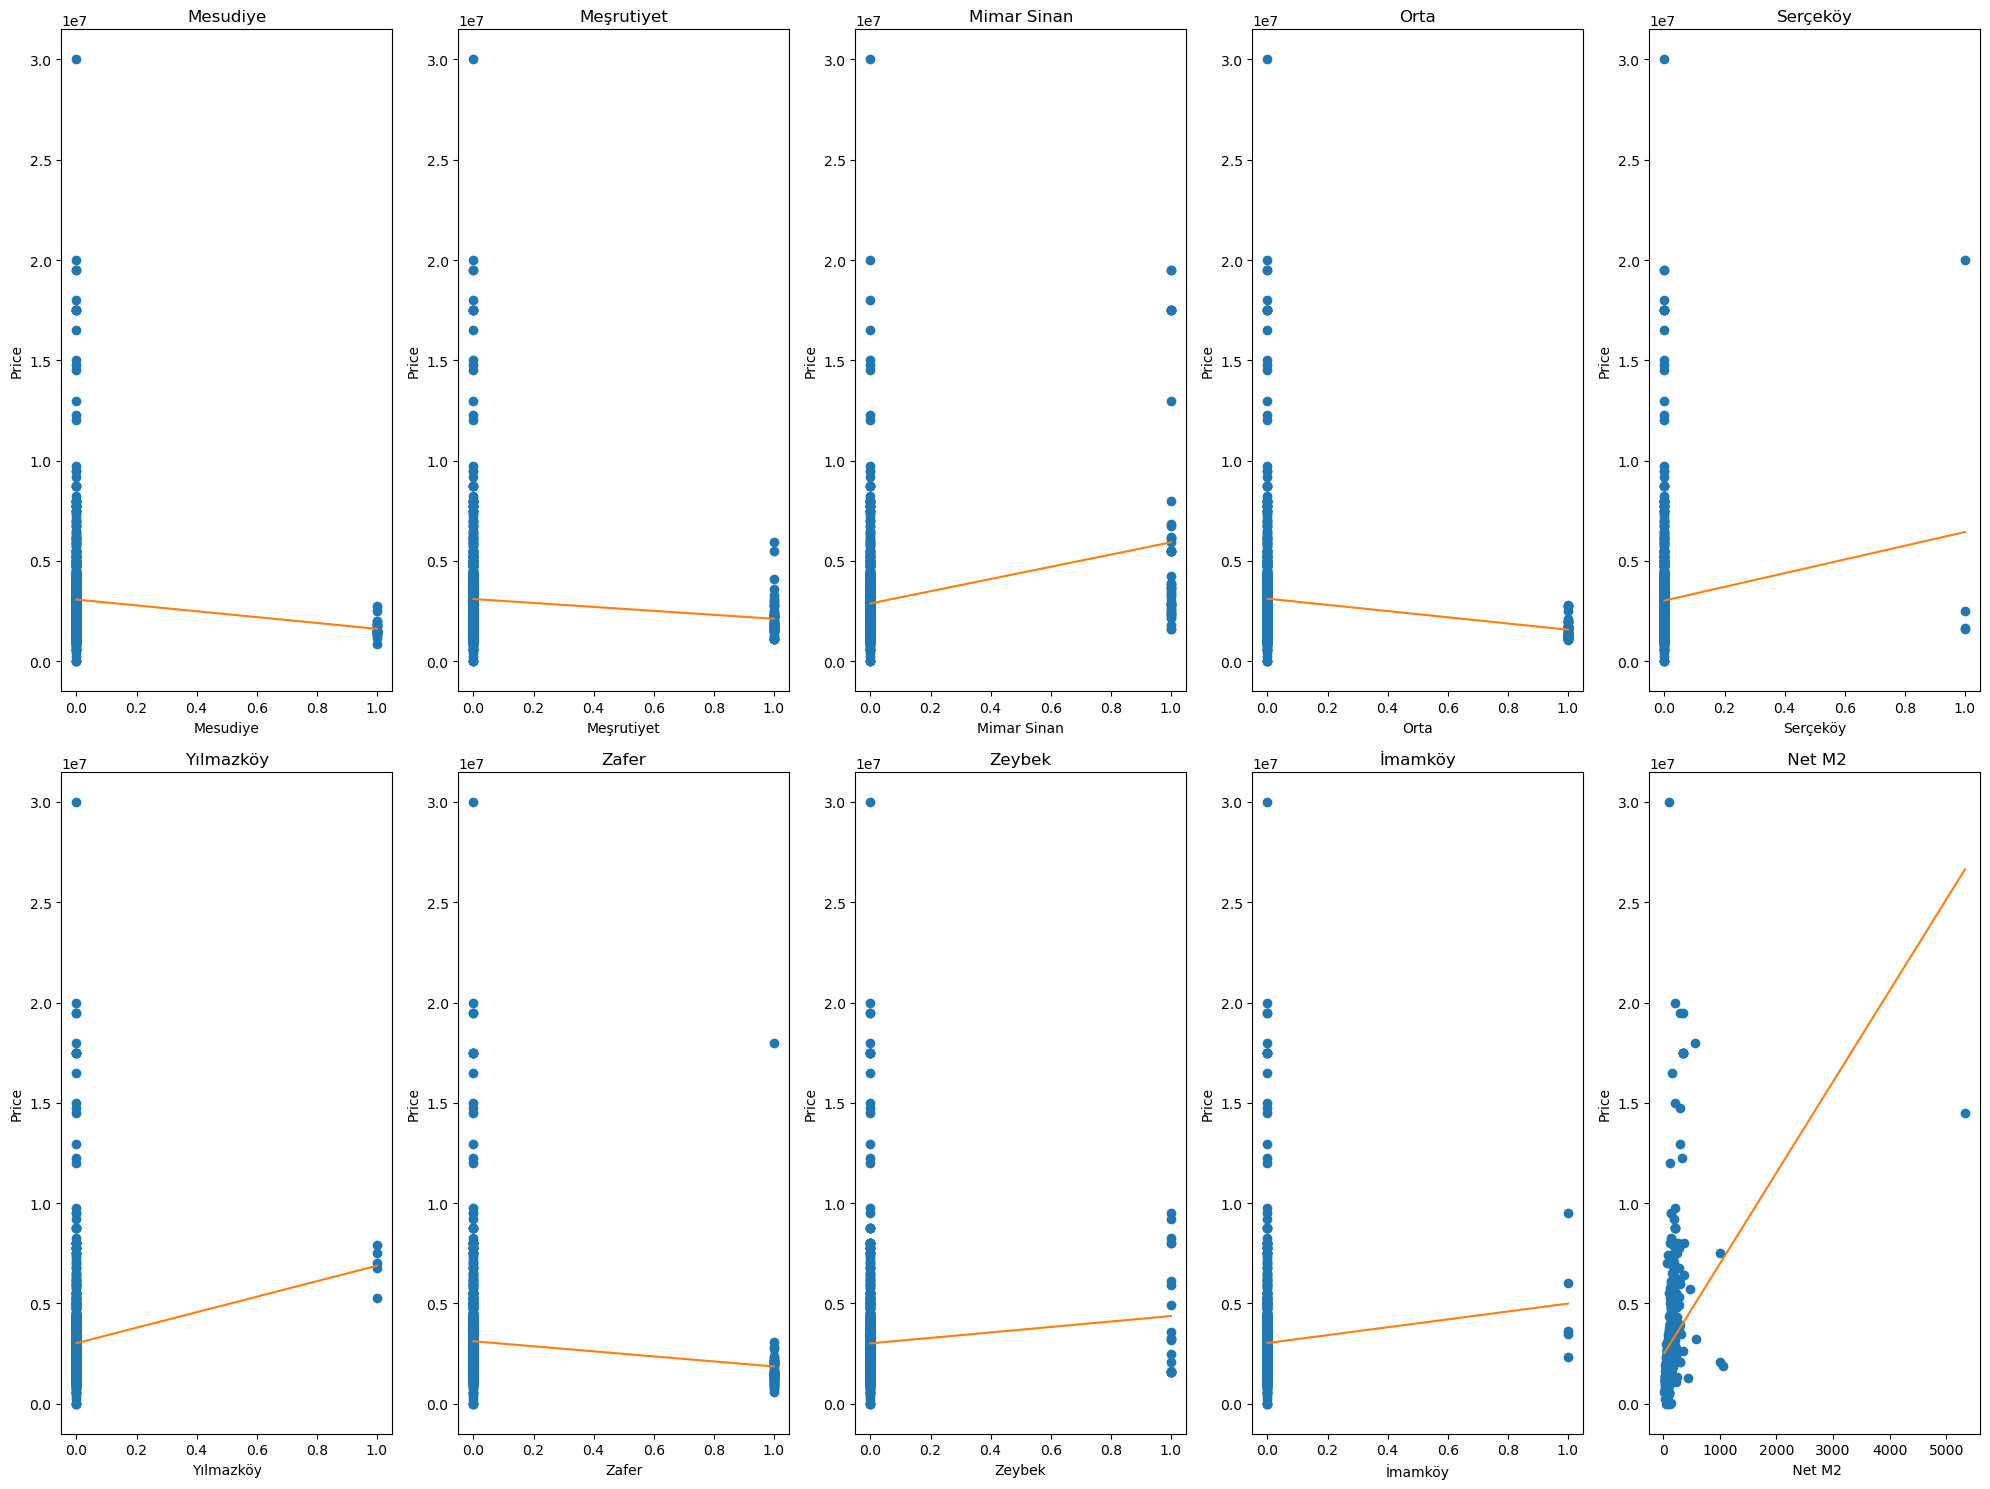

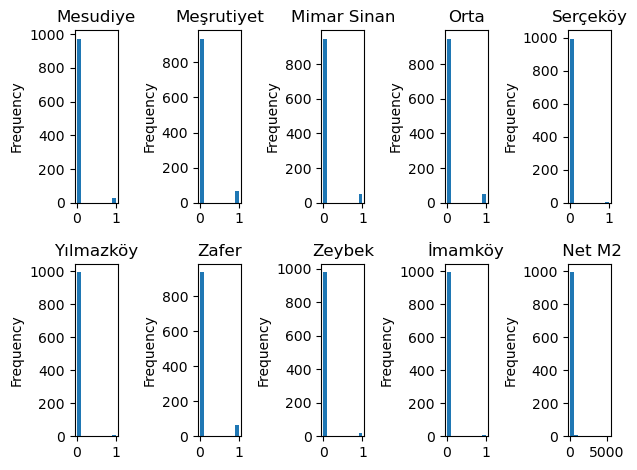

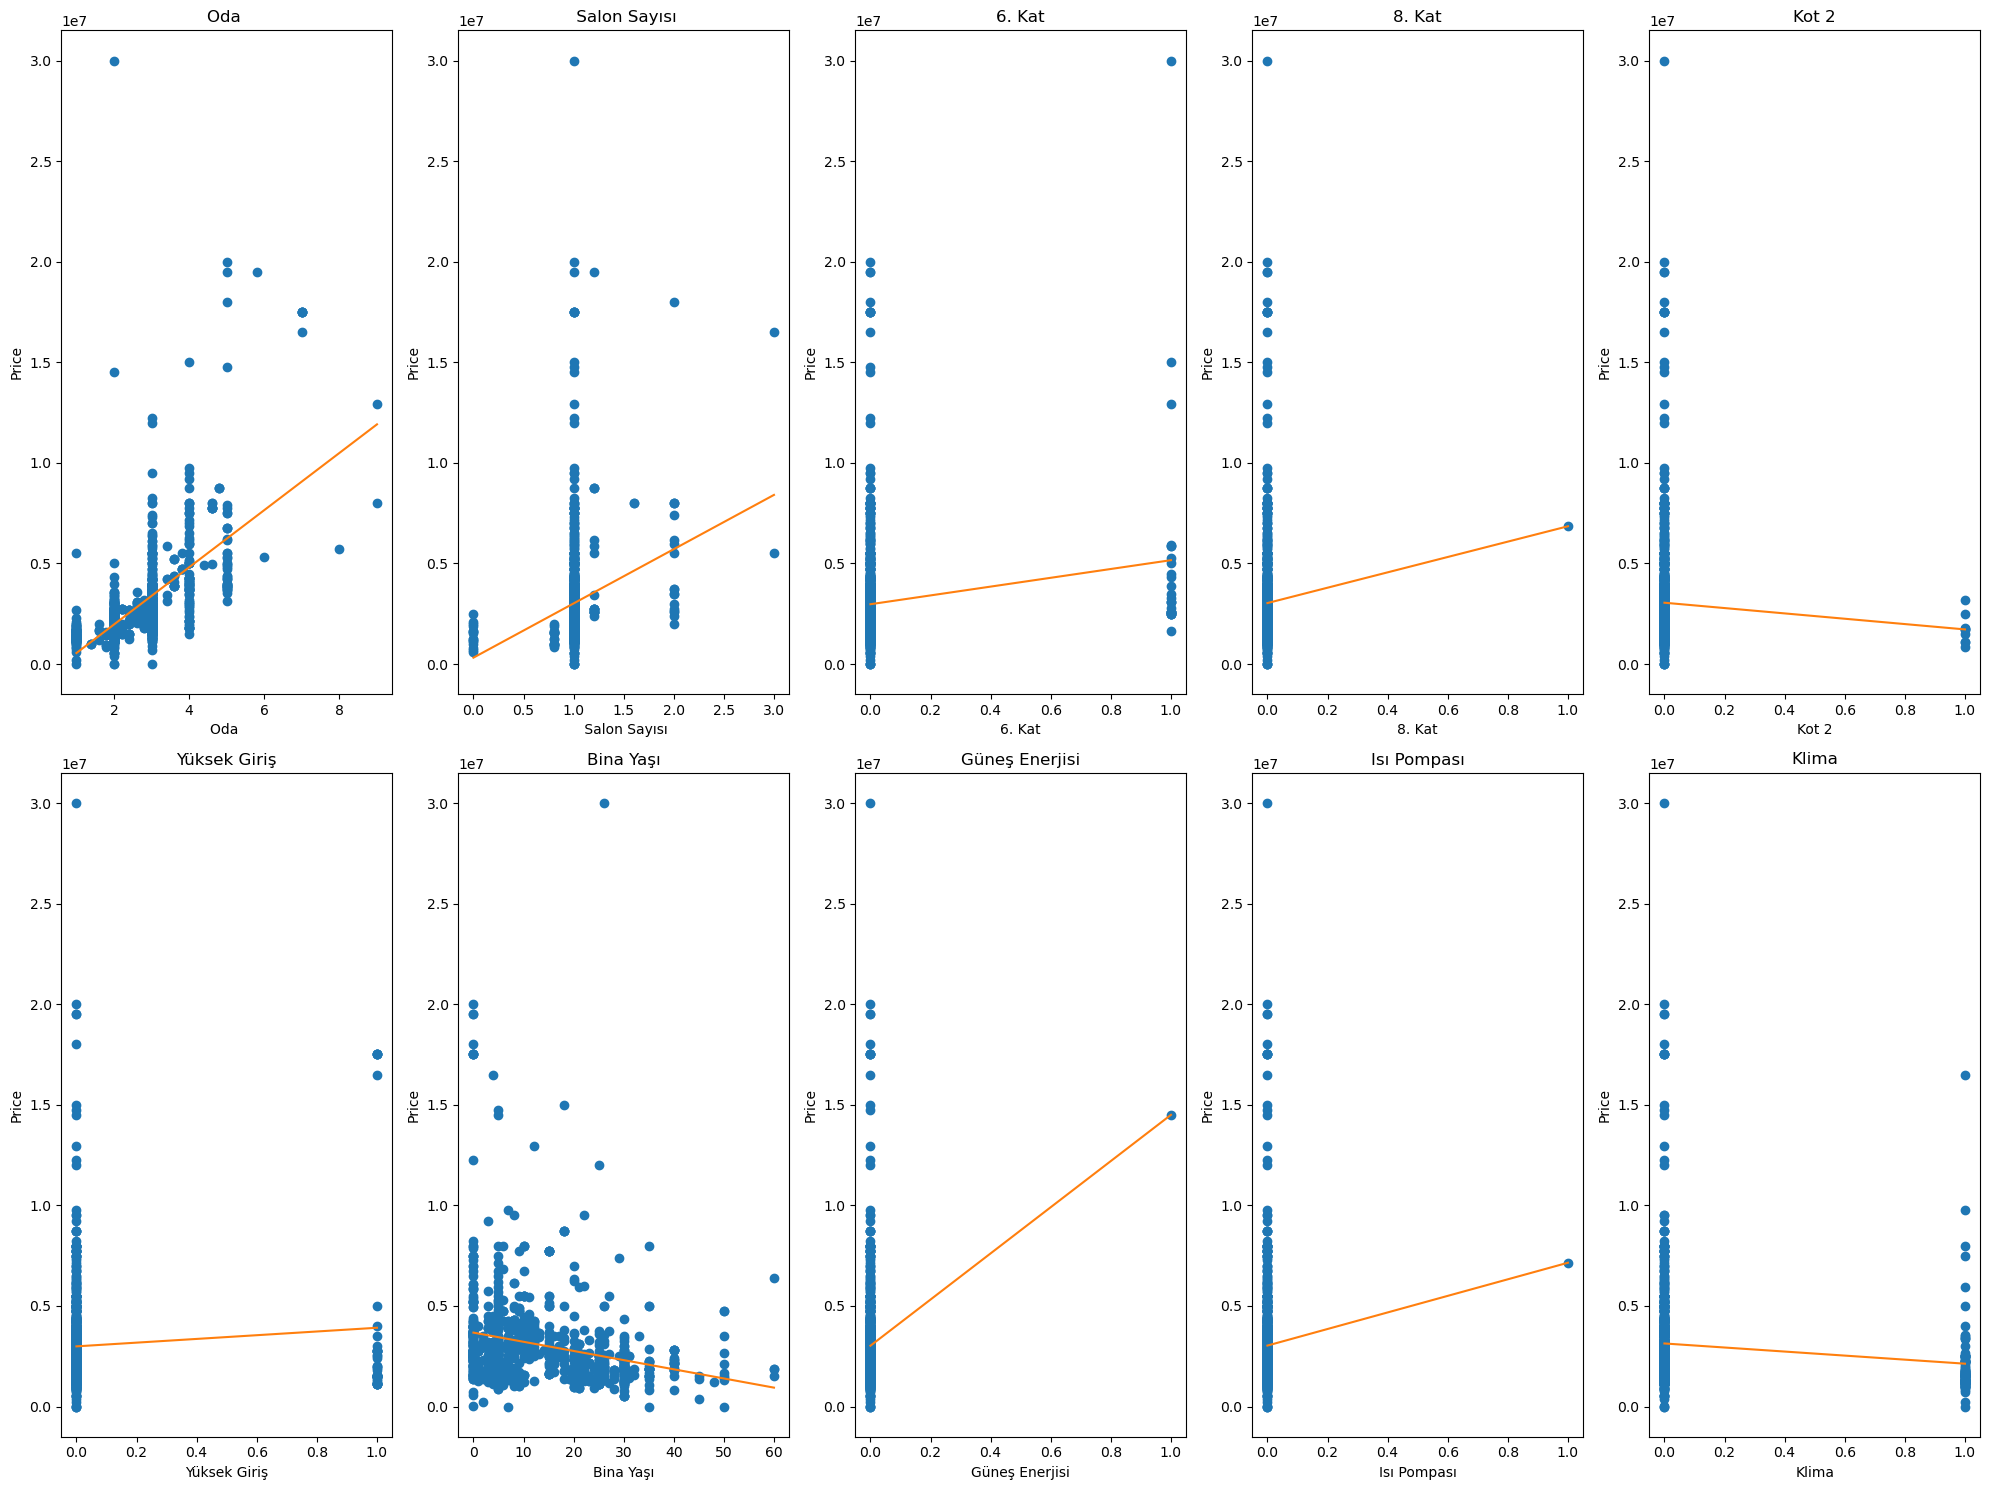

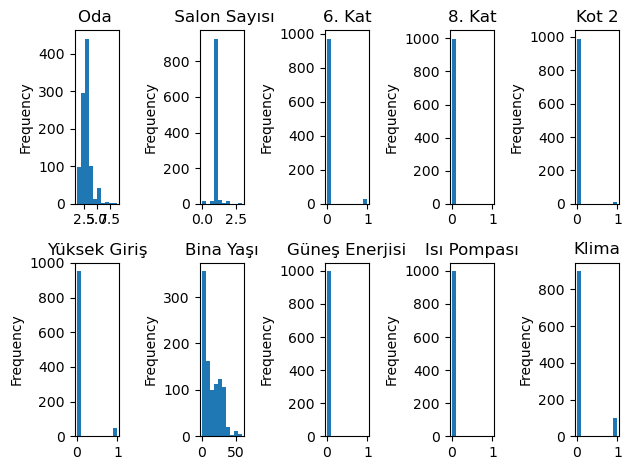

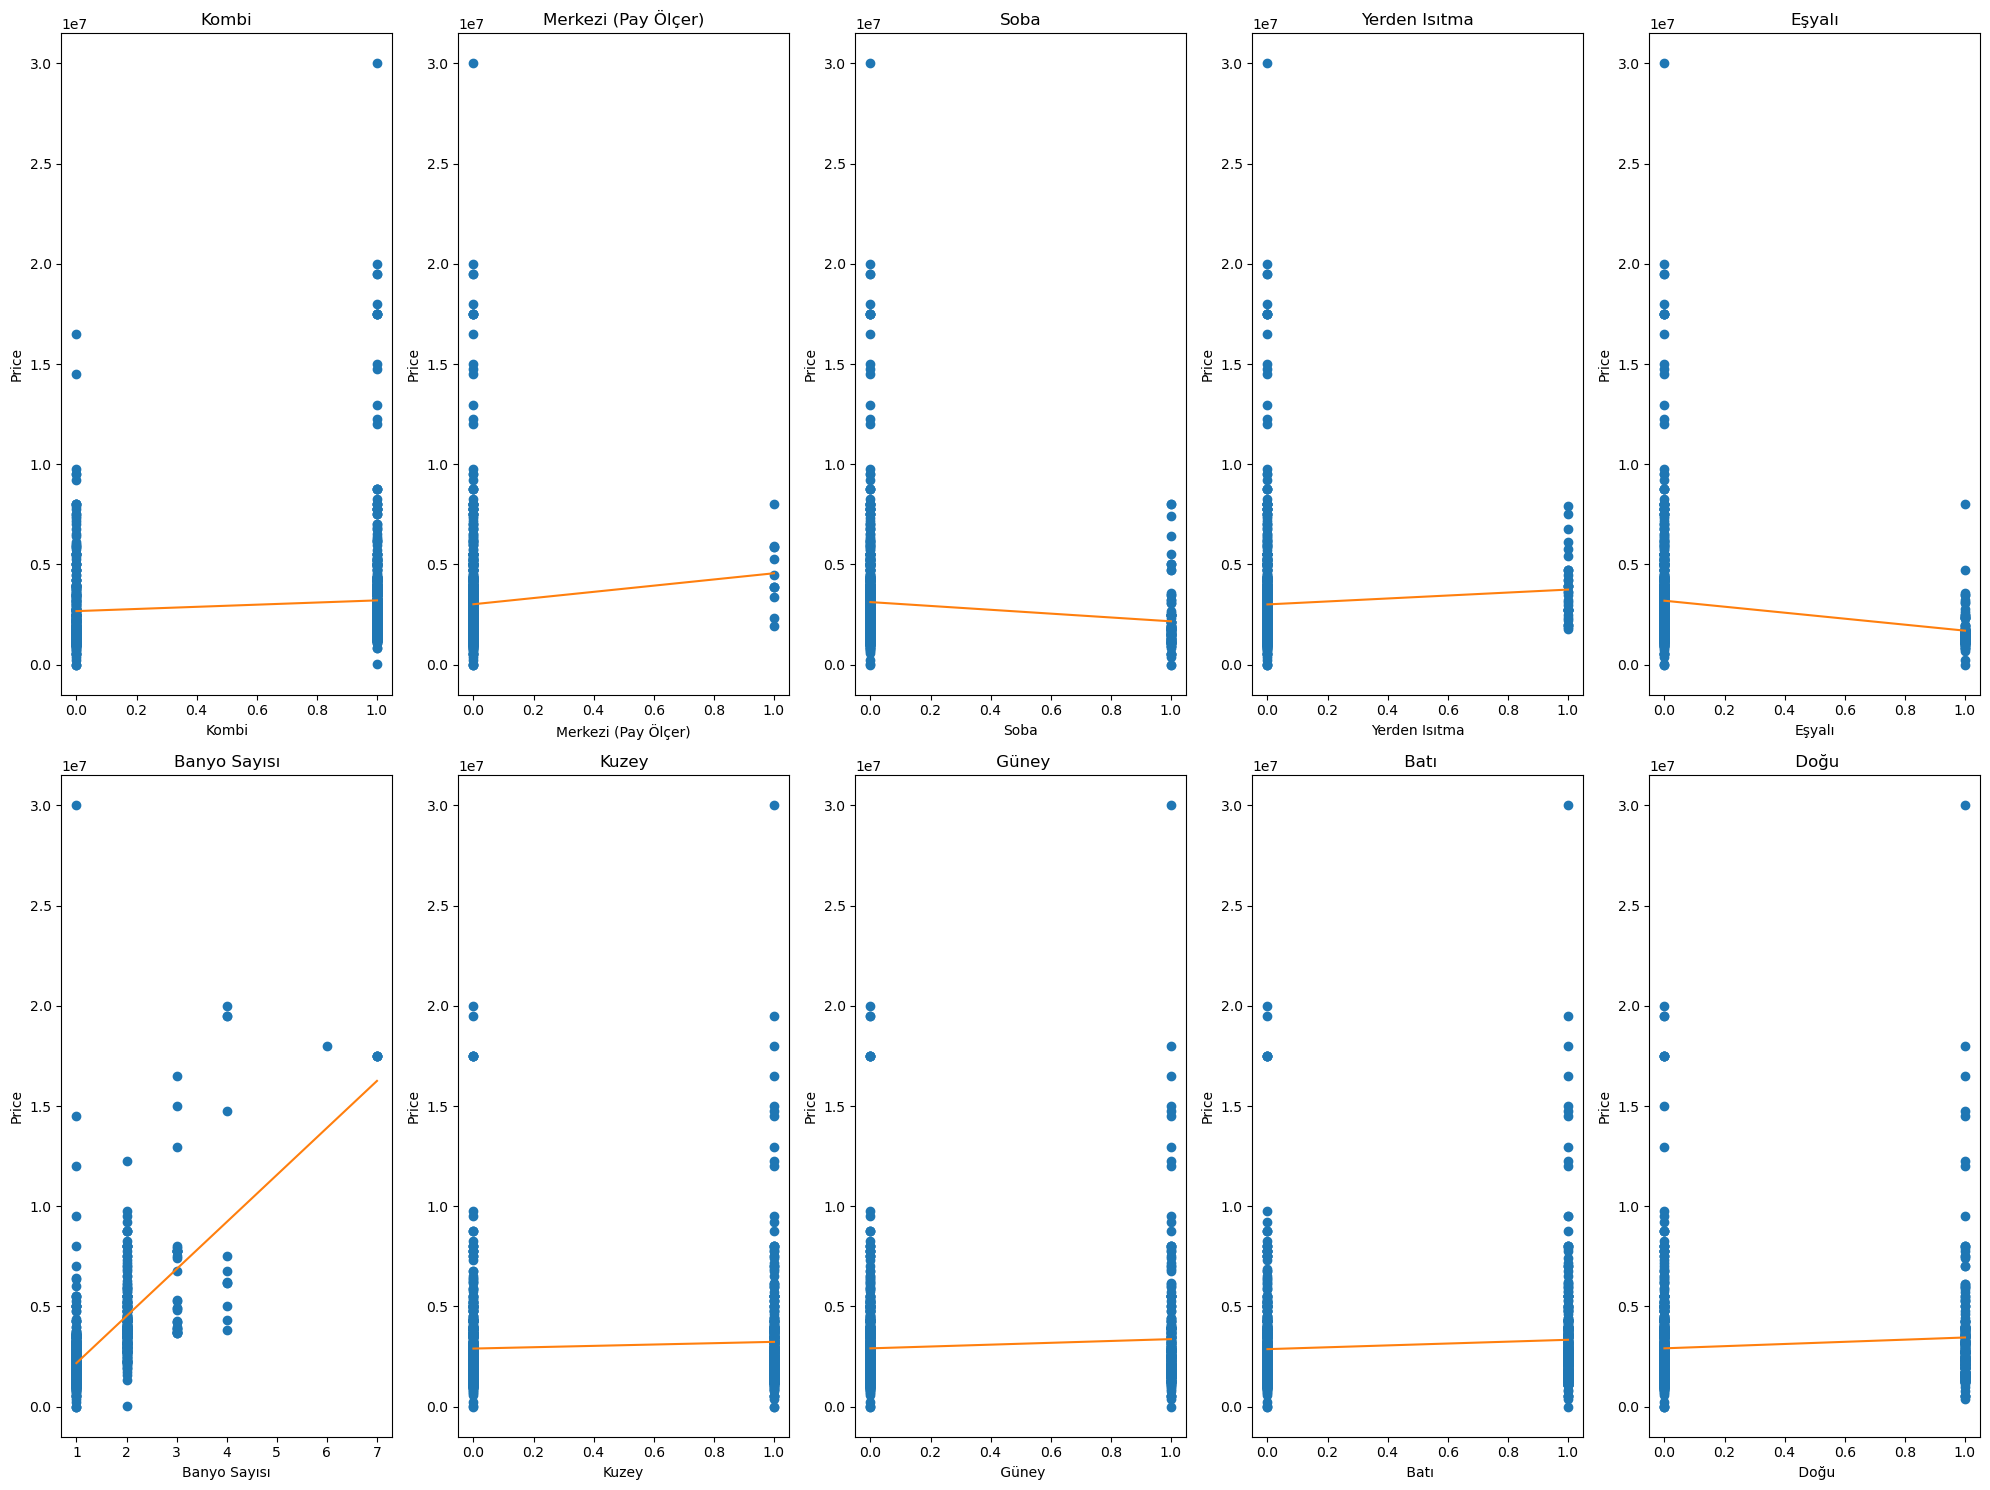

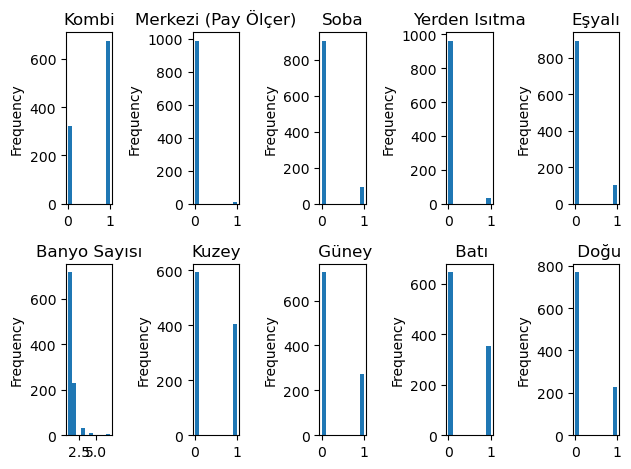

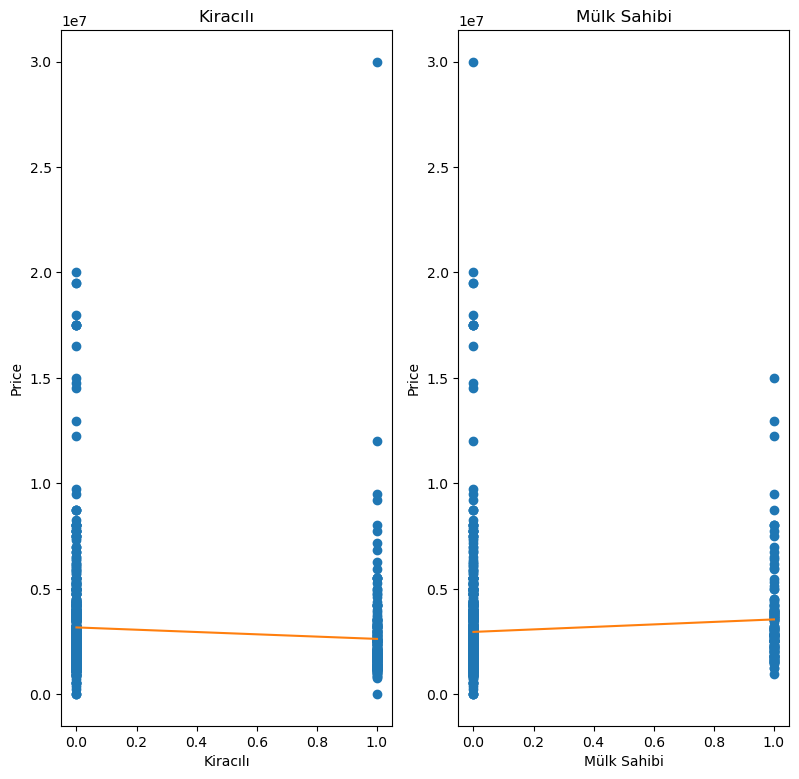

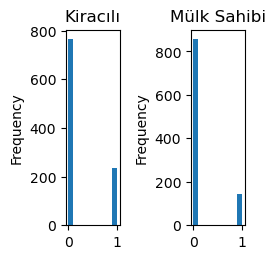

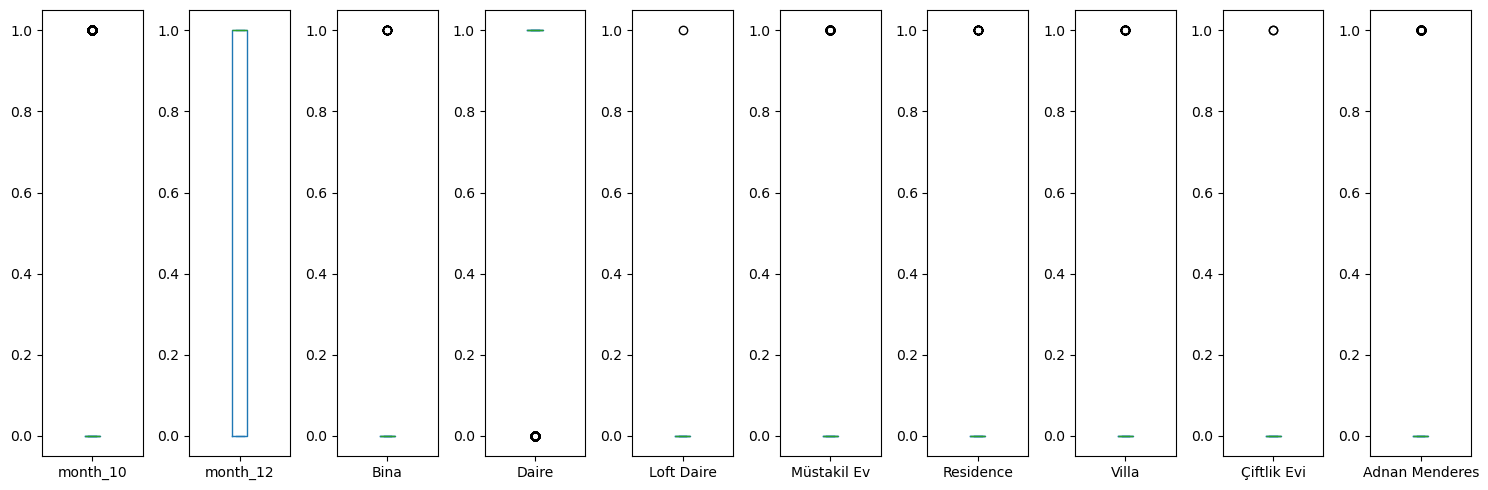

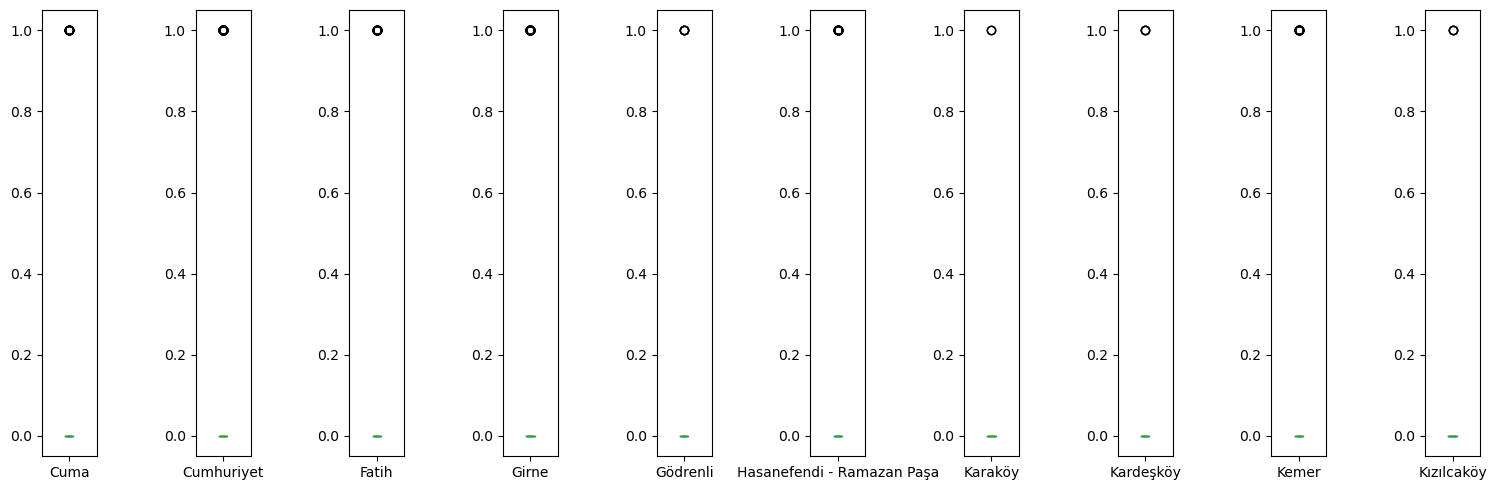

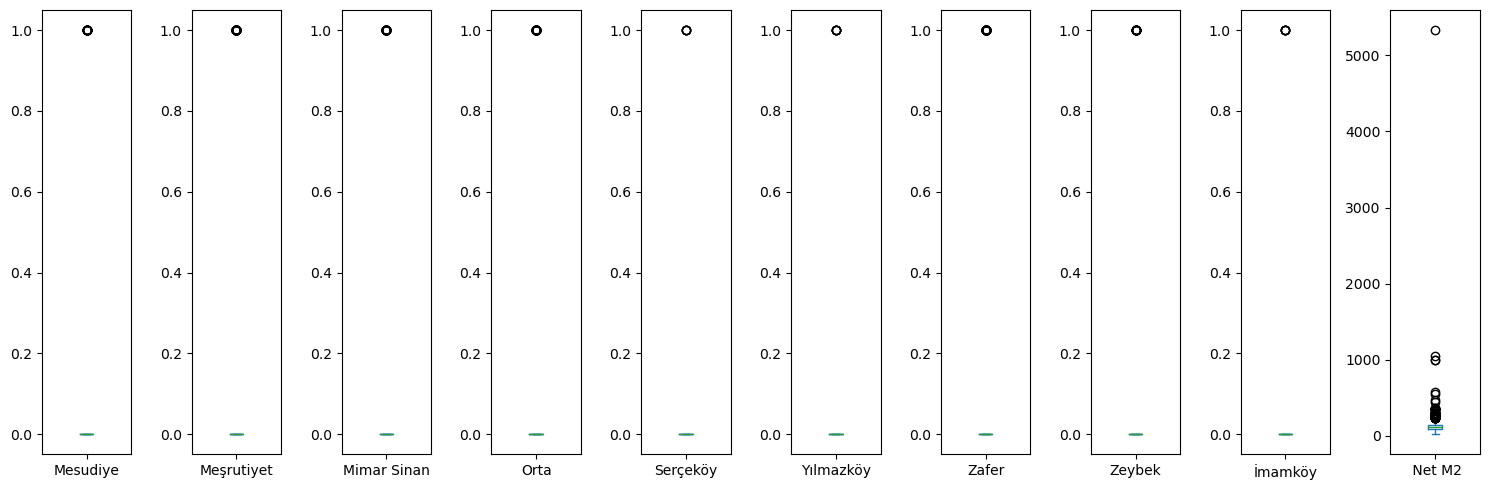

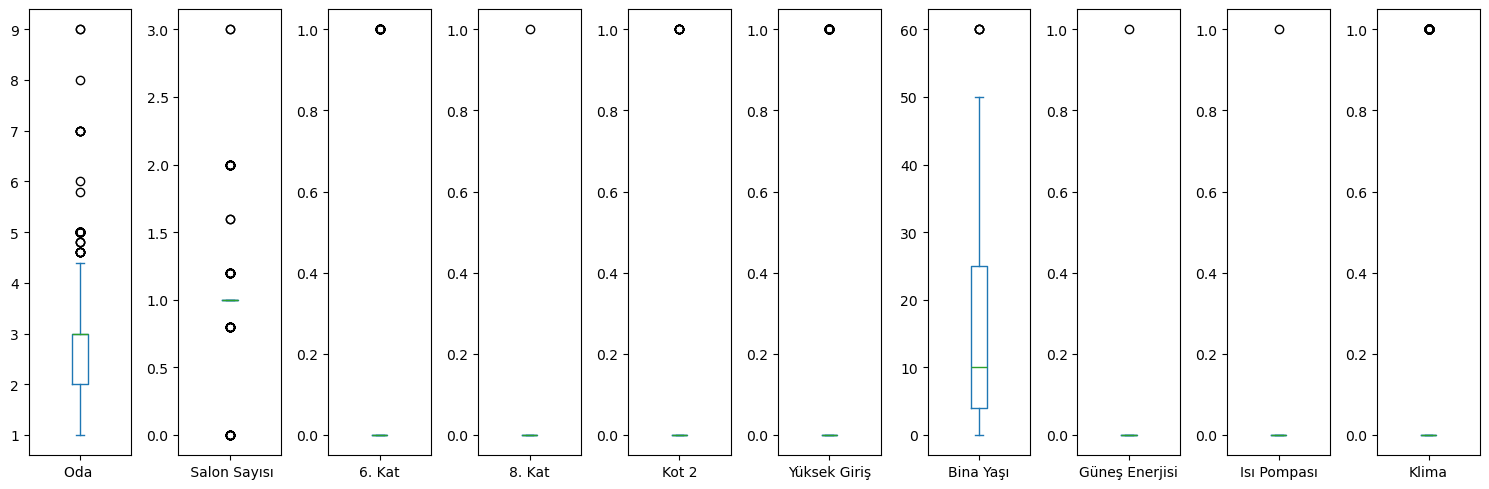

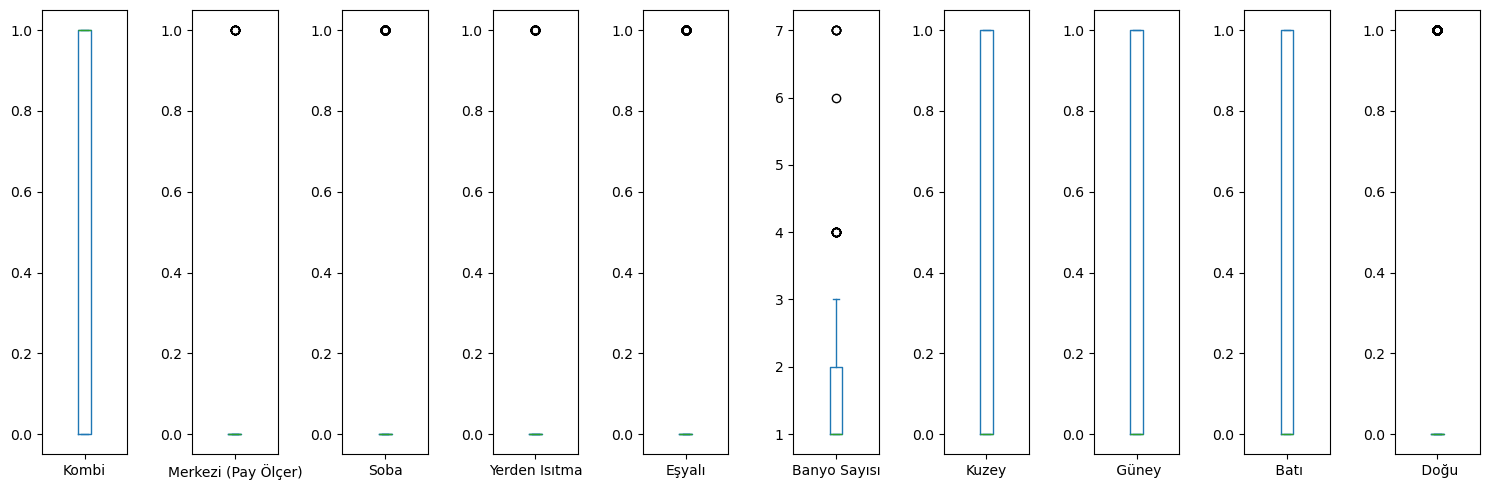

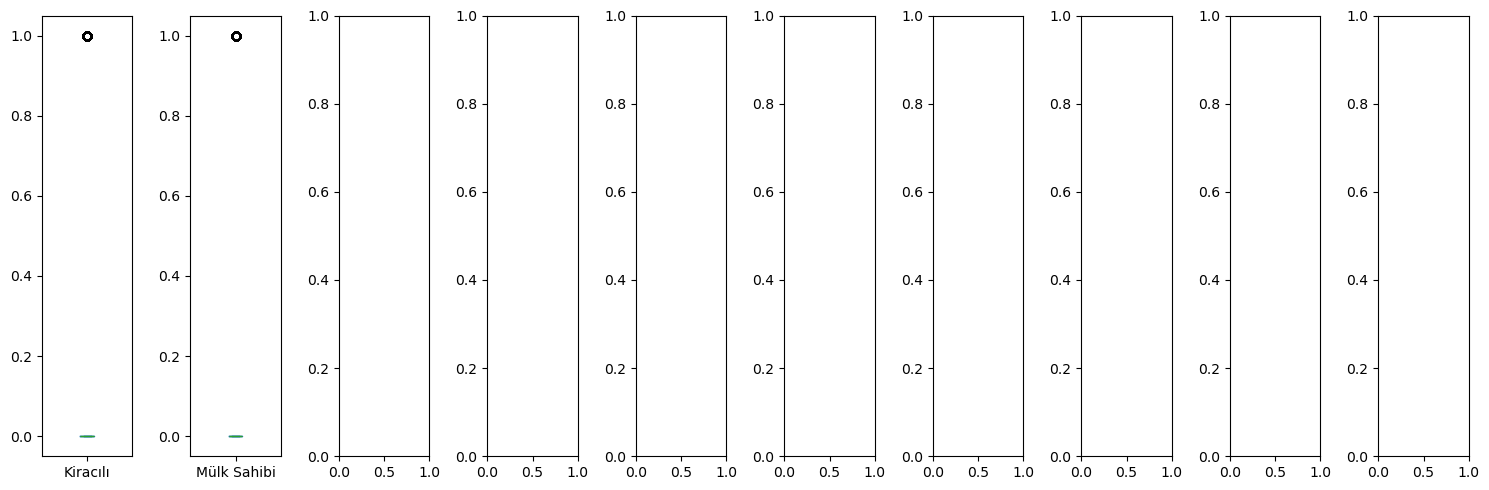

LR CV - r2score :  -13627870284665586368643072.0000000000000000
LR test-r2score :  0.8580456560821723
LR      : 0.04738473892211914 sec

gaus CV - r2score :  -0.9593619967645861
gaus test-r2score :  -2.8031602392100887
gaus    : 1.4582998752593994 sec

ridge CV - r2score :  0.5383039931681803
ridge test-r2score :  0.8597257337649817
ridge   : 0.06834053993225098 sec

LASSO CV - r2score :  0.5285094049761311
LASSO test-r2score :  0.8580457686662296
LASSO   : 0.17555856704711914 sec

EN CV - r2score :  0.5466699136152434
EN test-r2score :  0.7084040385338219
EN      : 0.04388308525085449 sec

KNN CV - r2score :  0.5687518105784708
KNN test-r2score :  0.6319601932141925
KNN     : 0.5984764099121094 sec

DT CV - r2score :  0.5518271081872679
DT test-r2score :  0.4865132521664189
DT      : 0.04986929893493652 sec

DT5 CV - r2score :  0.5523640773894314
DT5 test-r2score :  0.4678030714367948
DT5     : 0.028435945510864258 sec

RaFoReg CV - r2score :  0.6446934704649123
RaFoReg test-r2score :

  File "C:\Users\ilker\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


lgb CV - r2score :  0.6134017114340354
lgb test-r2score :  0.7314012580213167
lgb     : 0.610450267791748 sec

catb CV - r2score :  0.7053472605525558
catb test-r2score :  0.6845319765360389
catb    : 13.496642112731934 sec

All models:43.09197664260864 sec


best dependOnTest:  ridge
Test set r2 score (best model): 0.8597257337649817

Evaluation metric scores for best model which is ridge:
Test set r2: 0.8597257337649817
Test set MSE (Mean Squared Error): 828387216392.2657
Test set MAE (Mean Absolute Error): 634384.0917878181
Best model: ridge


In [1]:
# -*- coding: utf-8 -*-
"""
Created on Thu Mar 21 19:54:49 2024

@author: ilker
"""

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns

import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import Lars
from sklearn.linear_model import ARDRegression
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor
import time



datas = pd.read_excel(r"aydın_house_price.xlsx")
datas = datas.head(1000)

#encode------------------------------------------------------------------------
price=datas.iloc[:,7]
price = price.str.replace('.', '', regex=False)
price = price.str.replace(' TL', '', regex=False).str.strip()
price = price.astype(int)
#month of data collection
ay = datas['Ay']
ay_encoded = pd.get_dummies(ay, columns=['Month'], prefix='Month')
ay_encoded = ay_encoded.astype(int)

#date and drop day
date = pd.DataFrame()
date['year'] = pd.to_datetime(datas.iloc[:,8], format='%d/%m/%Y').dt.year
date['month'] = pd.to_datetime(datas.iloc[:,8], format='%d/%m/%Y').dt.month

date = pd.get_dummies(date, columns=['year', 'month']).astype(int)

#residential_type
residential_type = pd.get_dummies(datas.iloc[:,9], dtype=int)

#neighbourhood
neighbourhood = pd.get_dummies(datas.iloc[:,10], dtype=int)

#flat
flat = pd.get_dummies(datas.iloc[:,14], dtype=int)

#age
age = datas.iloc[:,15].str.extract('(\d+)', expand=False).fillna(0).astype(int)

#heating
heating_type = pd.get_dummies(datas.iloc[:,16], dtype=int)
heating_type = heating_type.drop(heating_type.columns[0], axis=1)
heating_type = heating_type.drop(heating_type.columns[3], axis=1)

#furniture
hasfurniture = pd.get_dummies(datas.iloc[:,17], dtype=int).iloc[:,0]

#facade
front = datas.iloc[:,19].str.split(',') 
direction = pd.DataFrame(columns=['Kuzey',' Güney',' Batı',' Doğu'])
for row in range(len(front)):
    if isinstance(front[row], list):
        direction.loc[row, 'Kuzey'] = 1 if 'Kuzey' in front.iloc[row] else 0
        direction.loc[row, ' Güney'] = 1 if ' Güney' in front.iloc[row] else 0
        direction.loc[row, ' Batı'] = 1 if ' Batı' in front.iloc[row] else 0
        direction.loc[row, ' Doğu'] = 1 if ' Doğu' in front.iloc[row] else 0
    else:
    
        direction.loc[row] = 0


#rent

rent=datas.iloc[:,20]
rent = rent.str.replace('.', '', regex=False)
rent = rent.str.replace(' TL', '', regex=False).str.strip()
rent = pd.to_numeric(rent, errors='coerce')
sum_rent = rent.sum(skipna=True)
meanr = sum_rent/3399#numbers of row
rent.fillna(meanr, inplace=True)

#state
state = pd.get_dummies(datas.iloc[:,21], dtype=int).iloc[:,2:]

#subscription
  #fill with mean
adiat = datas.iloc[:,22]
adiat = adiat.str.replace('.', '', regex=False)
adiat = adiat.str.replace(' TL', '', regex=False).str.strip()

adiat = pd.to_numeric(adiat, errors='coerce')

sum_adiat = adiat.sum(skipna=True)
mean = sum_adiat/3399
adiat.fillna(mean, inplace=True)

#fuel
fuel = pd.get_dummies(datas.iloc[:,23], dtype=int).iloc[:,1:]
#I dropped the fuel, there are 3 unnecessary ones


datas_without_columns = datas.drop(datas.columns[[7, 8,9,10,14,15,16,17,19,20,21,22,23]], axis=1)
datas0=datas.iloc[:,0:7]
datas1=datas.iloc[:,11:14]
datas2=datas.iloc[:,18]

#concat encoding
result = pd.concat([ay_encoded,datas0,price, date, residential_type,neighbourhood,datas1,flat,age,heating_type,hasfurniture,datas2,direction,rent,state,adiat], axis=1)
result = result.drop(result.columns[3],axis=1)


#data filling------------------------------------------------------------------------------
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5) 

result_imputed = imputer.fit_transform(result)

result = pd.DataFrame(result_imputed, columns=result.columns)

result.to_csv('aydın_house_price_edit.csv', index=False)

datas=result.copy()



#about--------------------------------------------------------------------------------------------------
print("Shape of the dataset",datas.shape)
print("dataset variable types:",datas.dtypes)
print("first 10 rows of the dataset")
print(datas.head(10))
print("statistical data of the dataset")
description=datas.describe()
print(description)

#corr------------------------------------------------------------------------------------------
print("Data set Variable variables are related to each other")
corr=np.abs(result.corr(method='pearson'))

column_index = result.columns.get_loc('Fiyat')
selected_column_name = result.columns[column_index]
column_correlations = corr[selected_column_name]

threshold = 0.045

filtered_correlations = column_correlations[abs(column_correlations) >= threshold]
selected_columns = filtered_correlations.index
filtered_corr = corr.loc[selected_columns, selected_columns]

new_df = result[selected_columns].copy()

#Heatmap--------------------------------------------------------------------------------------
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_corr, annot=False, fmt=".2f", linewidths=0.9, center=0)
plt.title(f"Corr Matrix (greater than: f{threshold})")
plt.show()

#Graph------------------------------------------------------------------------
inputs = new_df.drop('Fiyat', axis = 1)

output = new_df['Fiyat']

total_columns = len(inputs.columns)

num_cols_per_plot = 10

num_plots = total_columns // num_cols_per_plot
if total_columns % num_cols_per_plot != 0:
    num_plots += 1


for plot_index in range(num_plots):
    start_index = plot_index * num_cols_per_plot
    end_index = min((plot_index + 1) * num_cols_per_plot, total_columns)
    
    
    plt.figure(figsize=(20, 15))
    #graph
    for i, col in enumerate(inputs.columns[start_index:end_index]):
        plt.subplot(2, 5, i+1)  
        x = inputs[col]
        y = output
        plt.plot(x, y, 'o')
        plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
        plt.title(col)
        plt.xlabel(col)
        plt.ylabel('Price')

    plt.tight_layout()
    plt.show()
    #hist
    for i, col in enumerate(inputs.columns[start_index:end_index]):
        plt.subplot(2, 5, i+1)  
        inputs[col].hist(bins=10, grid=False)
        plt.title(col)
        plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

#box
for i in range(0, len(inputs.columns), 10):
    subset_columns = inputs.columns[i:i+10]  # İlgili sütun aralığını seç
    fig, axes = plt.subplots(1, 10, figsize=(15, 5), sharex=False, sharey=False)
    for idx, col in enumerate(subset_columns):
        inputs[col].plot(kind='box', ax=axes[idx])
    plt.tight_layout()
    plt.show()
    


#Regression-----------------------------------------------------------------------------------------
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore")
# Separate data into training and testing sets*********
x_train, x_test, y_train, y_test = train_test_split(inputs, output, test_size=0.2,train_size=0.8, random_state=47,shuffle=True)


from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

#Loading the models to be tried------------------------------------------------------------------------------
models = []
models.append(('LR', LinearRegression()))
models.append(('gaus', GaussianProcessRegressor( random_state=42)))

models.append(('ridge', RidgeCV()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet(alpha=2.5, l1_ratio=0.1, max_iter=1000,selection= 'random', tol=0.0001, random_state=47,warm_start= True)))
models.append(('KNN', KNeighborsRegressor()))

models.append(('DT', DecisionTreeRegressor(random_state=47)))
models.append(('DT5', DecisionTreeRegressor(criterion= 'friedman_mse',max_depth = 5,splitter= 'best',random_state = 47)))
models.append(('RaFoReg',RandomForestRegressor(n_estimators=150, random_state=47, n_jobs=-1,max_depth=10)))
models.append(('ExtraT', ExtraTreesRegressor(max_features=1.0,n_estimators=120, max_depth=9, min_samples_split=2,min_samples_leaf=1, random_state=42)))

models.append(('Ada',AdaBoostRegressor(base_estimator= DecisionTreeRegressor(max_depth=5), learning_rate=0.1, n_estimators= 100, random_state=42)))
models.append(('Graboost',GradientBoostingRegressor(n_estimators=150, max_depth=3, learning_rate=0.1, min_samples_split= 10,min_samples_leaf= 1, max_features= None,random_state=47)))

models.append(('ard',ARDRegression()))
models.append(('sgd',SGDRegressor()))

models.append(('lars',Lars()))
models.append(( 'histgb',HistGradientBoostingRegressor()))

#Voting
#models.append(('vote',VotingRegressor(estimators=[('a',LinearRegression()),
#                                                 ('b',AdaBoostRegressor(base_estimator= DecisionTreeRegressor(max_depth=5), learning_rate=0.1, n_estimators= 100, random_state=42)),
#                                                 ('c',xgb.XGBRegressor(verbosity=0,learning_rate = 0.01,max_depth= 5,n_estimators= 300,subsample= 0.8))])))

#SVR
models.append(('SVR-Linear', SVR(kernel="linear")))
models.append(('SVR-RBF', SVR(kernel='rbf')))
models.append(('SVR-Sigmoid', SVR(kernel="sigmoid")))
models.append(('SVR-Poly2', SVR(kernel="poly",degree=2)))
models.append(('SVR-Poly3', SVR(kernel="poly",degree=3)))

#ANN
models.append(('ANN-lbfgs',MLPRegressor(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(20,10,5), random_state=7)))
models.append(('ANN-sgd',MLPRegressor(solver='sgd', alpha=1e-5,hidden_layer_sizes=(20,10,5), random_state=7)))
models.append(('ANN-adam',MLPRegressor(solver='adam', alpha=1e-5,hidden_layer_sizes=(20,10,5), random_state=7)))

#Boosting
models.append(('xgb',xgb.XGBRegressor(verbosity=0,learning_rate = 0.01,max_depth= 5,n_estimators= 300,subsample= 0.8)))
models.append(('lgb',lgb.LGBMRegressor(verbose=-1)))
models.append(('catb',CatBoostRegressor(verbose=False)))

#Testing models------------------------------------------------------------------------------
num_folds = 10
results = {}

start_time0 = time.time()
for name, model in models:
    start_time = time.time()
    
    kfold = KFold(n_splits=num_folds,shuffle=True,random_state=47)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring="r2")
    
    mean_r2score = cv_results.mean()
    
    model.fit(X_train, y_train)
    test_r2score = model.score(X_test, y_test)
    results[name] = test_r2score
    
    
    print(f"{name} CV - r2score :  {mean_r2score:.16f}")
    print(f"{name} test-r2score :  {test_r2score:.16f}")
    
   
    end_time = time.time();elapsed_time = end_time - start_time;print(f"{name.ljust(8)}: {elapsed_time} sec\n")
    
end_time0 = time.time();elapsed_time = end_time0 - start_time0;print(f"All models:{elapsed_time} sec")
    

print("\n")

best_model = max(results, key=results.get)
print("best dependOnTest: ", best_model)


models_dict = dict(models)
# Train the best model
best_model_instance = models_dict.get(best_model)
best_model_instance.fit(X_train, y_train)

# Evaluate the performance of the best model on the test set
test_r2score = best_model_instance.score(X_test, y_test)
print("Test set r2 score (best model):", test_r2score)

# Calculate evaluation metrics for the best model
y_pred = best_model_instance.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print the evaluation metrics for the best model
print("\nEvaluation metric scores for best model which is {}:".format(best_model))
print("Test set r2:", test_r2score)
print("Test set MSE (Mean Squared Error):", mse)
print("Test set MAE (Mean Absolute Error):", mae)

import pickle

best_model = max(results, key=results.get)
print("Best model:", best_model)

best_model_instance = models_dict.get(best_model)

with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model_instance, f)